# Import

In [1]:
from main import ArduinoReader
from motion_stages import Zaber_2axis_LST1500D as motion_stage
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Research\Stage Script\motion_stages.py:63: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if status is 'S':


ModuleNotFoundError: No module named 'zaber_motion'

# Set to Center

In [2]:
stage = motion_stage()
stage.home_axes()

NameError: name 'motion_stage' is not defined

: 

In [ ]:
# initialize stage instance and zero axes
x_center = 1160.0  # in mm
y_center = 260.0  # in mm
stage.move_x_absolute(x_center)
stage.move_y_absolute(y_center)

# Initialize Arduino

In [ ]:
arduino = ArduinoReader('COM7', 9600)  # replace with your port 

# Callibrate over X and Y

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calibrate the sensor
# Set the calibration distance, in mm. The greater the distance, the more accurate the calibration.
calibration_distance = 100.0  # in mm

N_iterations = 10
calibration_results = []

for i in range(N_iterations):
    stage.move_x_absolute(x_center)
    stage.move_y_absolute(y_center)
    time.sleep(5)

    # Record initial sensor readings
    initial_sensor_x, initial_sensor_y = arduino.distanceSinceInit()

    # Move the stage
    stage.move_x_absolute(x_center - calibration_distance)
    stage.move_y_absolute(y_center - calibration_distance)
    time.sleep(5)

    # Record sensor readings after moving
    final_sensor_x, final_sensor_y = arduino.distanceSinceInit()

    # Calculate the sensor's reported movement
    sensor_movement_x = final_sensor_x - initial_sensor_x
    sensor_movement_y = final_sensor_y - initial_sensor_y

    # Calculate calibration factors
    calibration_factor_x = calibration_distance / sensor_movement_x
    calibration_factor_y = calibration_distance / sensor_movement_y

    # Print calibration factors
    print(f"Iteration {i+1} - Calibration factor for X: {calibration_factor_x}")
    print(f"Iteration {i+1} - Calibration factor for Y: {calibration_factor_y}")

    calibration_results.append({
        'Iteration': i+1,
        'Calibration_Factor_X': calibration_factor_x,
        'Calibration_Factor_Y': calibration_factor_y,
        'Sensor_Movement_X': sensor_movement_x,
        'Sensor_Movement_Y': sensor_movement_y,
        'Calibration_Distance': calibration_distance,
        'Initial_Sensor_X': initial_sensor_x,
        'Initial_Sensor_Y': initial_sensor_y,
        'Final_Sensor_X': final_sensor_x,
        'Final_Sensor_Y': final_sensor_y,
    })

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(calibration_results)

# Append the dataframe to the existing CSV file
with open('calibration_script_results.csv', 'a') as f:
    df.to_csv(f, header=f.tell()==0, index=False)

# Scatter plot of Calibration Factors X and Y over the iterations
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="Iteration", y="Calibration_Factor_X", color='r')
plt.title('Calibration Factor X over Iterations')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="Iteration", y="Calibration_Factor_Y", color='b')
plt.title('Calibration Factor Y over Iterations')

plt.tight_layout()
plt.show()

# Print out descriptive statistics of the calibration factors
print("\nDescriptive statistics for Calibration Factor X:")
print(df['Calibration_Factor_X'].describe())
print("\nDescriptive statistics for Calibration Factor Y:")
print(df['Calibration_Factor_Y'].describe())

# Calculate average calibration factors
average_calibration_factor_x = df['Calibration_Factor_X'].mean()
average_calibration_factor_y = df['Calibration_Factor_Y'].mean()

print(f"\nOn average, one millimeter in the x direction is equivalent to {average_calibration_factor_x} in sensor readings.")
print(f"On average, one millimeter in the y direction is equivalent to {average_calibration_factor_y} in sensor readings.")

# Scatter plot of stage movement vs sensor movement for X and Y directions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.regplot(data=df, x="Sensor_Movement_X", y="Calibration_Distance", color='r')
plt.title('Stage movement vs. Sensor Movement X')

plt.subplot(1, 2, 2)
sns.regplot(data=df, x="Sensor_Movement_Y", y="Calibration_Distance", color='b')
plt.title('Stage movement vs. Sensor Movement Y')

plt.tight_layout()
plt.show()

# cleanup
arduino.stop()



# Calibrate over only Y

Error on Iteration 1 Step 1: name 'stage' is not defined
Finished Iteration 1 Step 1
Estimated total time: 0:00:00.060840
Error on Iteration 1 Step 2: name 'stage' is not defined
Finished Iteration 1 Step 2
Error on Iteration 1 Step 3: name 'stage' is not defined
Finished Iteration 1 Step 3
Error on Iteration 1 Step 4: name 'stage' is not defined
Finished Iteration 1 Step 4
Error on Iteration 1 Step 5: name 'stage' is not defined
Finished Iteration 1 Step 5
Error on Iteration 1 Step 6: name 'stage' is not defined
Finished Iteration 1 Step 6
Error on Iteration 2 Step 1: name 'stage' is not defined
Finished Iteration 2 Step 1
Error on Iteration 2 Step 2: name 'stage' is not defined
Finished Iteration 2 Step 2
Error on Iteration 2 Step 3: name 'stage' is not defined
Finished Iteration 2 Step 3
Error on Iteration 2 Step 4: name 'stage' is not defined
Finished Iteration 2 Step 4
Error on Iteration 2 Step 5: name 'stage' is not defined
Finished Iteration 2 Step 5
Error on Iteration 2 Step 6:

KeyError: 'Step'

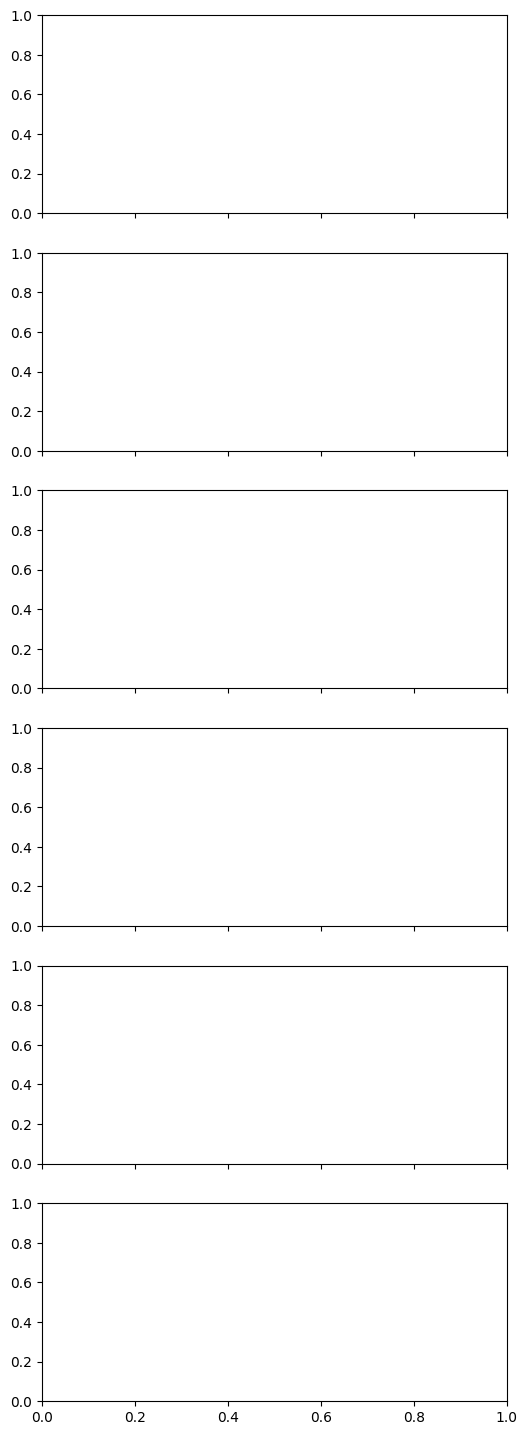

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

start_position = (1150, 500)
movement_distance_y = 50.0  # in mm
N_movements = 6

# Calibration factor for Y
calibration_factor_y = -0.045808520384

# Move to the start position
stage.move_absolute(start_position[0], start_position[1])
time.sleep(5)

commanded_positions = []
actual_positions = []

# Perform the series of movements
for i in range(N_movements):
    # Commanded position
    commanded_y = start_position[1] + (i + 1) * movement_distance_y
    commanded_positions.append(commanded_y)

    # Move to the commanded position
    stage.move_y_absolute(commanded_y)
    time.sleep(5)

    # Record the sensor's reported distance moved, convert to actual distance using the calibration factor
    sensor_movement_y = arduino.distanceSinceInit()
    actual_movement_y = sensor_movement_y * calibration_factor_y
    actual_positions.append(actual_movement_y + commanded_positions[-2] if i > 0 else actual_movement_y + start_position[1])

    print(f"Commanded position Y: {commanded_y}, Actual position Y: {actual_positions[-1]}")

# Plot the commanded vs actual positions
plt.figure()
plt.scatter(range(1, N_movements+1), commanded_positions, color='red', label='Commanded Positions')
plt.scatter(range(1, N_movements+1), actual_positions, color='blue', label='Actual Positions')
plt.xlabel('Movement number')
plt.ylabel('Position Y (mm)')
plt.title('Commanded vs Actual Positions in Y direction')
plt.legend()
plt.show()


# Graphing the Drift

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import euclidean

initial_x = []
initial_y = []
final_x = []
final_y = []
calibration_factors_x = []
calibration_factors_y = []

for i in range(len(calibration_results)):
    initial_x.append(calibration_results[i]['Initial_Sensor_X'])
    initial_y.append(calibration_results[i]['Initial_Sensor_Y'])
    final_x.append(calibration_results[i]['Final_Sensor_X'])
    final_y.append(calibration_results[i]['Final_Sensor_Y'])
    calibration_factors_x.append(calibration_results[i]['Calibration_Factor_X'])
    calibration_factors_y.append(calibration_results[i]['Calibration_Factor_Y'])

initial_x = np.array(initial_x)
initial_y = np.array(initial_y)
final_x = np.array(final_x)
final_y = np.array(final_y)
calibration_factors_x = np.array(calibration_factors_x)
calibration_factors_y = np.array(calibration_factors_y)

mean_calibration_factor_x = np.mean(calibration_factors_x)
mean_calibration_factor_y = np.mean(calibration_factors_y)

# Calculate the distances from the start and stop points
initial_distances_mm = np.array([euclidean((mean_calibration_factor_x*initial_x[0], mean_calibration_factor_y*initial_y[0]), 
                                           (mean_calibration_factor_x*x, mean_calibration_factor_y*y)) for x, y in zip(initial_x, initial_y)])

final_distances_mm = np.array([euclidean((mean_calibration_factor_x*final_x[0], mean_calibration_factor_y*final_y[0]), 
                                         (mean_calibration_factor_x*x, mean_calibration_factor_y*y)) for x, y in zip(final_x, final_y)])

# Convert distances into pandas Series for easier statistical analysis
initial_distances_series = pd.Series(initial_distances_mm)
final_distances_series = pd.Series(final_distances_mm)

# Get detailed descriptive statistics for the distances
initial_distances_desc = initial_distances_series.describe()
final_distances_desc = final_distances_series.describe()

print("\nDescriptive statistics for Start Distance (in mm):")
print(initial_distances_desc)

print("\nDescriptive statistics for Stop Distance (in mm):")
print(final_distances_desc)

# Create two subplots for start and stop positions
fig, axs = plt.subplots(2, figsize=(10, 12))

# Start positions plot
axs[0].scatter(mean_calibration_factor_x*initial_x, mean_calibration_factor_y*initial_y, alpha=0.5)
axs[0].plot(mean_calibration_factor_x*initial_x[0], mean_calibration_factor_y*initial_y[0], 'ro')  # starting point in red
for i in range(1, len(initial_x)):
    x_change = mean_calibration_factor_x*(initial_x[i] - initial_x[i-1])
    y_change = mean_calibration_factor_y*(initial_y[i] - initial_y[i-1])
    total_change = np.sqrt(x_change**2 + y_change**2)
    axs[0].plot([mean_calibration_factor_x*initial_x[i-1], mean_calibration_factor_x*initial_x[i]], [mean_calibration_factor_y*initial_y[i-1], mean_calibration_factor_y*initial_y[i]], 'k--')
    axs[0].text((mean_calibration_factor_x*initial_x[i] + mean_calibration_factor_x*initial_x[i-1])/2, (mean_calibration_factor_y*initial_y[i] + mean_calibration_factor_y*initial_y[i-1])/2, f"x:{x_change:.2f}, y:{y_change:.2f}, total:{total_change:.2f}", fontsize=8)
for i, txt in enumerate(range(1, len(initial_x)+1)):
    axs[0].annotate(txt, (mean_calibration_factor_x*initial_x[i], mean_calibration_factor_y*initial_y[i]), fontsize=8)
axs[0].set_title("Start Positions")
axs[0].set_xlabel('$x$ (mm)')
axs[0].set_ylabel('$y$ (mm)')
axs[0].grid(True)

# Stop positions plot
axs[1].scatter(mean_calibration_factor_x*final_x, mean_calibration_factor_y*final_y, alpha=0.5)
axs[1].plot(mean_calibration_factor_x*final_x[0], mean_calibration_factor_y*final_y[0], 'go')  # stopping point in green
for i in range(1, len(final_x)):
    x_change = mean_calibration_factor_x*(final_x[i] - final_x[i-1])
    y_change = mean_calibration_factor_y*(final_y[i] - final_y[i-1])
    total_change = np.sqrt(x_change**2 + y_change**2)
    axs[1].plot([mean_calibration_factor_x*final_x[i-1], mean_calibration_factor_x*final_x[i]], [mean_calibration_factor_y*final_y[i-1], mean_calibration_factor_y*final_y[i]], 'k--')
    axs[1].text((mean_calibration_factor_x*final_x[i] + mean_calibration_factor_x*final_x[i-1])/2, (mean_calibration_factor_y*final_y[i] + mean_calibration_factor_y*final_y[i-1])/2, f"x:{x_change:.2f}, y:{y_change:.2f}, total:{total_change:.2f}", fontsize=8)
for i, txt in enumerate(range(1, len(final_x)+1)):
    axs[1].annotate(txt, (mean_calibration_factor_x*final_x[i], mean_calibration_factor_y*final_y[i]), fontsize=8)
axs[1].set_title("Stop Positions")
axs[1].set_xlabel('$x$ (mm)')
axs[1].set_ylabel('$y$ (mm)')
axs[1].grid(True)

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib.patches import Circle

# # Load the calibration results from the CSV file
# df = pd.read_csv('calibration_script_results.csv')

# # Convert sensor readings to mm using the calibration factors
# df['Initial_Sensor_X_mm'] = df['Initial_Sensor_X'] * df['Calibration_Factor_X']
# df['Initial_Sensor_Y_mm'] = df['Initial_Sensor_Y'] * df['Calibration_Factor_Y']
# df['Final_Sensor_X_mm'] = df['Final_Sensor_X'] * df['Calibration_Factor_X']
# df['Final_Sensor_Y_mm'] = df['Final_Sensor_Y'] * df['Calibration_Factor_Y']

# # Define a new DataFrame for plotting purpose
# plot_df = pd.concat([
#     df[['Initial_Sensor_X_mm', 'Initial_Sensor_Y_mm']].rename(columns={'Initial_Sensor_X_mm': 'X', 'Initial_Sensor_Y_mm': 'Y'}).assign(Position='Start'),
#     df[['Final_Sensor_X_mm', 'Final_Sensor_Y_mm']].rename(columns={'Final_Sensor_X_mm': 'X', 'Final_Sensor_Y_mm': 'Y'}).assign(Position='Stop')
# ])

# # Compute mean start and stop positions
# mean_start_x = df['Initial_Sensor_X_mm'].mean()
# mean_start_y = df['Initial_Sensor_Y_mm'].mean()

# mean_stop_x = df['Final_Sensor_X_mm'].mean()
# mean_stop_y = df['Final_Sensor_Y_mm'].mean()

# # Calculate the distance of each start and stop position from the mean start and stop positions
# df['Start_Distance_mm'] = np.sqrt((df['Initial_Sensor_X_mm'] - mean_start_x)**2 + (df['Initial_Sensor_Y_mm'] - mean_start_y)**2)
# df['Stop_Distance_mm'] = np.sqrt((df['Final_Sensor_X_mm'] - mean_stop_x)**2 + (df['Final_Sensor_Y_mm'] - mean_stop_y)**2)

# # Scatter plot of initial and final sensor readings for both X and Y directions
# plt.figure(figsize=(8, 8))
# sns.scatterplot(data=plot_df, x="X", y="Y", hue='Position')
# plt.scatter(mean_start_x, mean_start_y, color='green', s=100, label='Expected Start')
# plt.scatter(mean_stop_x, mean_stop_y, color='red', s=100, label='Expected Stop')
# plt.title('Initial vs Final Sensor Readings (in mm)')
# plt.legend()

# plt.show()

# # Print out descriptive statistics for the distances of each start and stop position from the mean start and stop positions
# print("\nDescriptive statistics for Start Distance (in mm):")
# print(df['Start_Distance_mm'].describe())
# print("\nDescriptive statistics for Stop Distance (in mm):")
# print(df['Stop_Distance_mm'].describe())